In [3]:
import yfinance as yf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
#Pull IYT (Transportation ETF) data
ticker = "IYT" 
start= "1990-01-01" 
end= "2021-05-14"

transport = yf.download(ticker, start=start, end=end,progress=False)
transport = transport.asfreq(freq='D').ffill().dropna()
transport.to_csv('resources/transport.csv')
transport.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-02,54.000000,54.279999,54.000000,54.279999,44.933609,2300.0
2004-01-03,54.000000,54.279999,54.000000,54.279999,44.933609,2300.0
2004-01-04,54.000000,54.279999,54.000000,54.279999,44.933609,2300.0
2004-01-05,54.150002,54.150002,53.889999,54.130001,44.809425,3500.0
2004-01-06,54.040001,54.380001,54.009998,54.299999,44.950169,52800.0


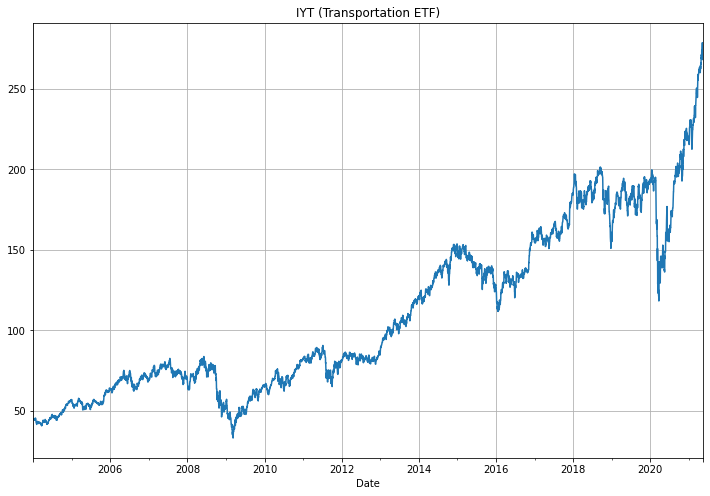

In [11]:
#Plot IYT historical prices
transport_plot = transport['Adj Close'].plot(figsize=(12,8), title='IYT (Transportation ETF)', grid=True)

In [7]:
# Pull S&P Index historical values from yfinance API
ticker = "^GSPC" 
start= "2004-01-02" 
end= "2021-05-14"

sp_history = yf.download(ticker, start=start, end=end, progress=False)
sp_history = sp_history.asfreq(freq='D').ffill().dropna()
sp_history.to_csv('resources/sp_history.csv')
sp_history.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-02,1111.920044,1118.849976,1105.079956,1108.479980,1108.479980,1.153200e+09
2004-01-03,1111.920044,1118.849976,1105.079956,1108.479980,1108.479980,1.153200e+09
2004-01-04,1111.920044,1118.849976,1105.079956,1108.479980,1108.479980,1.153200e+09
2004-01-05,1108.479980,1122.219971,1108.479980,1122.219971,1122.219971,1.578200e+09
2004-01-06,1122.219971,1124.459961,1118.439941,1123.670044,1123.670044,1.494500e+09


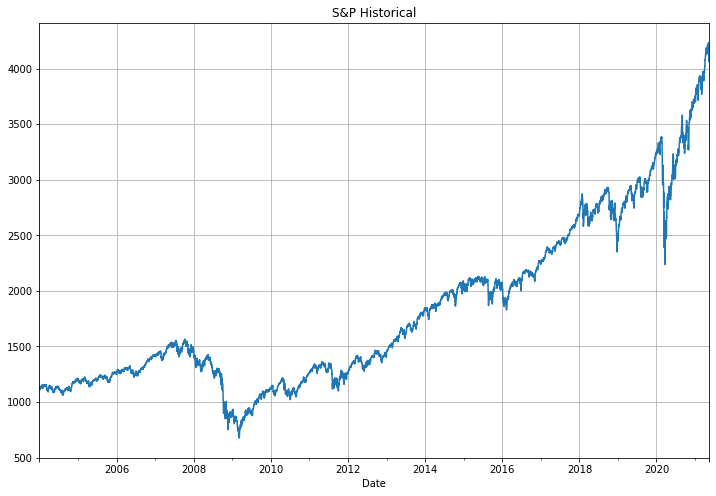

In [8]:
#Plot S&P Index historical data
sp_plot = sp_history['Adj Close'].plot(figsize=(12,8), title='S&P Historical', grid=True)

In [20]:
#Calculate IYT percent change and 200-day rolling average
transport_percent_change = transport['Adj Close'].pct_change()
transport_percent_change_rolling = transport_percent_change.rolling(window=200).mean()

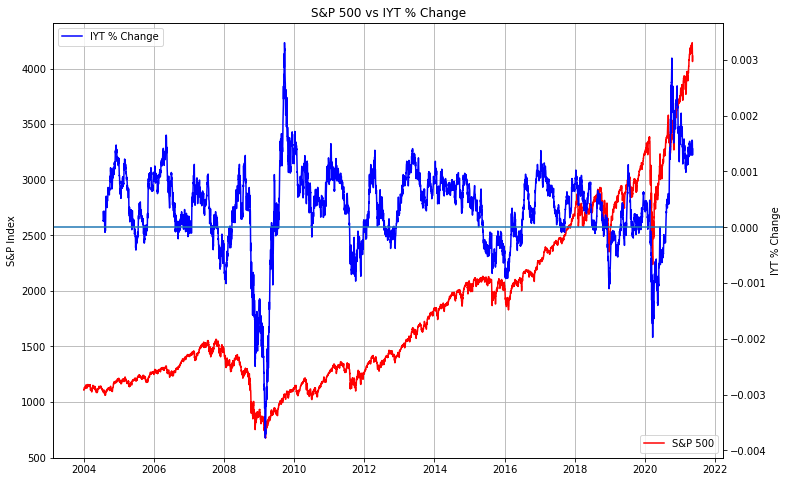

In [21]:
#Plot IYT percent change 200-day rolling average vs S&P 500 index to identify % change below and above y value of 0 
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(sp_history['Adj Close'], label ='S&P 500', color='r')
ax.set_ylabel('S&P Index')
plt.grid()
ax.legend(loc='lower right')

ax2 = ax.twinx()
plt.plot(transport_percent_change_rolling, label='IYT % Change', color='b')
ax.set_title('S&P 500 vs IYT % Change')
ax2.set_ylabel('IYT % Change')
ax2.axhline(y=0)
ax2.legend(loc='upper left')